In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpltools import style
from mpltools import layout
%matplotlib inline

//anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
#neoproterozoic model
rotation_model = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Merdith_2017_Model_Paper/Neoproterozoic_rotations.rot')
topology_features = ['/Users/Andrew/Documents/PhD/Merdith_2017_Model_Paper/Convergence.gpml',
                     '/Users/Andrew/Documents/PhD/Merdith_2017_Model_Paper/Divergence.gpml',
                     '/Users/Andrew/Documents/PhD/Merdith_2017_Model_Paper/Transform.gpml',     
                     '/Users/Andrew/Documents/PhD/Merdith_2017_Model_Paper/Topologies.gpml']

#NB can ignore transform boundaries by ommiting their loading line of code above

In [3]:
#present day
rotation_model_Phanerozoic = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot'
topology_features_Ceno_Meso = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz'
topology_features_Palaeozoic = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz'

In [4]:
num_time_steps = 1000
num_time_steps_PD = 1
num_time_steps_Ceno_Meso = 250
num_time_steps_Palaeozoic = 410

In [5]:
Ridge_length_Ceno_Meso = []
Trench_length_Ceno_Meso = []
Fault_length_Ceno_Meso = []
Boundary_total_Ceno_Meso = []
for time in range(0 ,num_time_steps_Ceno_Meso + 1,1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features_Ceno_Meso, rotation_model_Phanerozoic, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Ridge_length_Ceno_Meso.append(total_ridge_length_in_kms)
    Trench_length_Ceno_Meso.append(total_subduction_zone_length_in_kms)
    Fault_length_Ceno_Meso.append(total_fault_length_in_kms)
    Boundary_total_Ceno_Meso.append(total_boundary_length_in_kms)
    
    #print "At time %dMa, total ridge length is %f kms, total fault length is %f kms and total subduction zone length is %f kms." % (
    #        time, total_ridge_length_in_kms, total_fault_length_in_kms, total_subduction_zone_length_in_kms)
    
    print "At time %dMa, total boundary length is %f kms" % (
            time, total_boundary_length_in_kms)

At time 0Ma, total boundary length is 181728.615166 kms
At time 1Ma, total boundary length is 181742.885943 kms
At time 2Ma, total boundary length is 180815.302148 kms
At time 3Ma, total boundary length is 179935.270844 kms
At time 4Ma, total boundary length is 183550.857708 kms
At time 5Ma, total boundary length is 181808.450909 kms
At time 6Ma, total boundary length is 182804.749510 kms
At time 7Ma, total boundary length is 183248.205529 kms
At time 8Ma, total boundary length is 182544.504186 kms
At time 9Ma, total boundary length is 180548.711200 kms
At time 10Ma, total boundary length is 179600.714901 kms
At time 11Ma, total boundary length is 179723.380705 kms
At time 12Ma, total boundary length is 175420.362365 kms
At time 13Ma, total boundary length is 175775.215452 kms
At time 14Ma, total boundary length is 175548.830784 kms
At time 15Ma, total boundary length is 187929.078428 kms
At time 16Ma, total boundary length is 187024.345033 kms
At time 17Ma, total boundary length is 18

In [6]:
Ridge_length_Palaeozoic = []
Trench_length_Palaeozoic = []
Fault_length_Palaeozoic = []
Boundary_total_Palaeozoic = []
for time in range(251 ,num_time_steps_Palaeozoic + 1, 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features_Palaeozoic, rotation_model_Phanerozoic, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Ridge_length_Palaeozoic.append(total_ridge_length_in_kms)
    Trench_length_Palaeozoic.append(total_subduction_zone_length_in_kms)
    Fault_length_Palaeozoic.append(total_fault_length_in_kms)
    Boundary_total_Palaeozoic.append(total_boundary_length_in_kms)
    
    #print "At time %dMa, total ridge length is %f kms, total fault length is %f kms and total subduction zone length is %f kms." % (
    #        time, total_ridge_length_in_kms, total_fault_length_in_kms, total_subduction_zone_length_in_kms)
    
    print "At time %dMa, total boundary length is %f kms" % (
            time, total_boundary_length_in_kms)

At time 251Ma, total boundary length is 157735.638106 kms
At time 252Ma, total boundary length is 157909.239121 kms
At time 253Ma, total boundary length is 157881.948257 kms
At time 254Ma, total boundary length is 166655.234438 kms
At time 255Ma, total boundary length is 167091.042833 kms
At time 256Ma, total boundary length is 169290.480586 kms
At time 257Ma, total boundary length is 170585.065099 kms
At time 258Ma, total boundary length is 171769.255122 kms
At time 259Ma, total boundary length is 173077.484492 kms
At time 260Ma, total boundary length is 170806.008788 kms
At time 261Ma, total boundary length is 171444.057835 kms
At time 262Ma, total boundary length is 172165.552853 kms
At time 263Ma, total boundary length is 172390.520198 kms
At time 264Ma, total boundary length is 172358.177365 kms
At time 265Ma, total boundary length is 174266.166544 kms
At time 266Ma, total boundary length is 174134.152985 kms
At time 267Ma, total boundary length is 169646.438504 kms
At time 268Ma,

In [7]:
# for present day
Ridge_length_PD = []
Trench_length_PD = []
Fault_length_PD = []
Boundary_total_PD = []
for time in range(0 ,num_time_steps_PD + 0,1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features_Ceno_Meso, rotation_model_Phanerozoic, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Ridge_length_PD.append(total_ridge_length_in_kms)
    Trench_length_PD.append(total_subduction_zone_length_in_kms)
    Fault_length_PD.append(total_fault_length_in_kms)
    Boundary_total_PD.append(total_boundary_length_in_kms)
    
    #print "At time %dMa, total ridge length is %f kms, total fault length is %f kms and total subduction zone length is %f kms." % (
    #        time, total_ridge_length_in_kms, total_fault_length_in_kms, total_subduction_zone_length_in_kms)
    
    print "At time %dMa, total boundary length is %f kms" % (
            time, total_boundary_length_in_kms)

At time 0Ma, total boundary length is 181728.615166 kms


In [8]:
Trench_length_PD

[57389.42771262046]

In [9]:
# for Neoprot
Ridge_length = []
Trench_length = []
Fault_length = []
Boundary_total = []
for time in range(520,num_time_steps + 1,1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
                # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Ridge_length.append(total_ridge_length_in_kms)
    Trench_length.append(total_subduction_zone_length_in_kms)
    Fault_length.append(total_fault_length_in_kms)
    Boundary_total.append(total_boundary_length_in_kms)
    
    #print "At time %dMa, total ridge length is %f kms, total fault length is %f kms and total subduction zone length is %f kms." % (
    #        time, total_ridge_length_in_kms, total_fault_length_in_kms, total_subduction_zone_length_in_kms)
    
    print "At time %dMa, total boundary length is %f kms" % (
            time, total_boundary_length_in_kms)

At time 520Ma, total boundary length is 133597.046160 kms
At time 521Ma, total boundary length is 122215.470881 kms
At time 522Ma, total boundary length is 122132.604483 kms
At time 523Ma, total boundary length is 122056.899972 kms
At time 524Ma, total boundary length is 122248.284231 kms
At time 525Ma, total boundary length is 122422.305933 kms
At time 526Ma, total boundary length is 122342.719017 kms
At time 527Ma, total boundary length is 122266.567519 kms
At time 528Ma, total boundary length is 122292.907171 kms
At time 529Ma, total boundary length is 122224.173886 kms
At time 530Ma, total boundary length is 122847.823726 kms
At time 531Ma, total boundary length is 122473.410469 kms
At time 532Ma, total boundary length is 121751.073344 kms
At time 533Ma, total boundary length is 122036.666061 kms
At time 534Ma, total boundary length is 122108.016345 kms
At time 535Ma, total boundary length is 121996.481870 kms
At time 536Ma, total boundary length is 122153.370857 kms
At time 537Ma,

In [10]:
N = 10
time_Neop = range(520,num_time_steps + 1,1)
time_Matthews = range(0, num_time_steps_Palaeozoic + 1, 1)
time = range(0, num_time_steps +1, 1)

In [11]:
xRidge = np.asarray(Ridge_length)
xTrench = np.asarray(Trench_length)
xFault = np.asarray(Fault_length)
xTotal = np.asarray(Boundary_total)

In [13]:
np.average(xTrench)

51266.010038320528

In [16]:
np.average(xTrench)/xTrench_PD

array([ 0.8933006])

In [14]:
xRidge_PD = np.asarray(Ridge_length_PD)
xTrench_PD = np.asarray(Trench_length_PD)
xFault_PD = np.asarray(Fault_length_PD)
xTotal_PD = np.asarray(Boundary_total_PD)

In [16]:
xRidge_Ceno_Meso = np.asarray(Ridge_length_Ceno_Meso)
xTrench_Ceno_Meso = np.asarray(Trench_length_Ceno_Meso)
xFault_Ceno_Meso = np.asarray(Fault_length_Ceno_Meso)
xTotal_Ceno_Meso = np.asarray(Boundary_total_Ceno_Meso)
xRidge_Palaeozoic = np.asarray(Ridge_length_Palaeozoic)
xTrench_Palaeozoic = np.asarray(Trench_length_Palaeozoic)
xFault_Palaeozoic = np.asarray(Fault_length_Palaeozoic)
xTotal_Palaeozoic = np.asarray(Boundary_total_Palaeozoic)

xRidge_Matthews = np.hstack((xRidge_Ceno_Meso, xRidge_Palaeozoic))
xTrench_Matthews = np.hstack((xTrench_Ceno_Meso, xTrench_Palaeozoic))
xFault_Matthews = np.hstack((xFault_Ceno_Meso, xFault_Palaeozoic))
xTotal_Matthews = np.hstack((xTotal_Ceno_Meso, xTotal_Palaeozoic))

In [17]:
Ridge_Fault_PD = xRidge_PD+xFault_PD
Ridge_Fault_Matthews = xRidge_Matthews+xFault_Matthews
Ridge_Fault = xRidge+xFault

In [18]:
Ridge_rolling_mean = pd.rolling_mean(xRidge, N, min_periods=1)
Trench_rolling_mean = pd.rolling_mean(xTrench, N, min_periods=1)
Fault_rolling_mean = pd.rolling_mean(xFault, N, min_periods=1)
Total_rolling_mean = pd.rolling_mean(xTotal, N, min_periods=1)
Ridge_Fault_rolling_mean = pd.rolling_mean(Ridge_Fault, N, min_periods=1)

Ridge_rolling_mean_PD = pd.rolling_mean(xRidge_PD, N, min_periods=1)
Trench_rolling_mean_PD = pd.rolling_mean(xTrench_PD, N, min_periods=1)
Fault_rolling_mean_PD = pd.rolling_mean(xFault_PD, N, min_periods=1)
Total_rolling_mean_PD = pd.rolling_mean(xTotal_PD, N, min_periods=1)
Ridge_Fault_rolling_mean_PD = pd.rolling_mean(Ridge_Fault_PD, N, min_periods=1)

Ridge_rolling_mean_Matthews = pd.rolling_mean(xRidge_Matthews, N, min_periods=1)
Trench_rolling_mean_Matthews = pd.rolling_mean(xTrench_Matthews, N, min_periods=1)
Fault_rolling_mean_Matthews = pd.rolling_mean(xFault_Matthews, N, min_periods=1)
Total_rolling_mean_Matthews = pd.rolling_mean(xTotal_Matthews, N, min_periods=1)
Ridge_Fault_rolling_mean_Matthews = pd.rolling_mean(Ridge_Fault_Matthews, N, min_periods=1)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is 

In [19]:
time_Matthews

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [20]:
#plotting parameters
linewidth=15.0
markersize=60
axes_title_fontsize = 120
tick_fontsize = 90
title_fontsize = 70
leg_font = 100
major_ticks = np.arange(0, 1040, 40) 

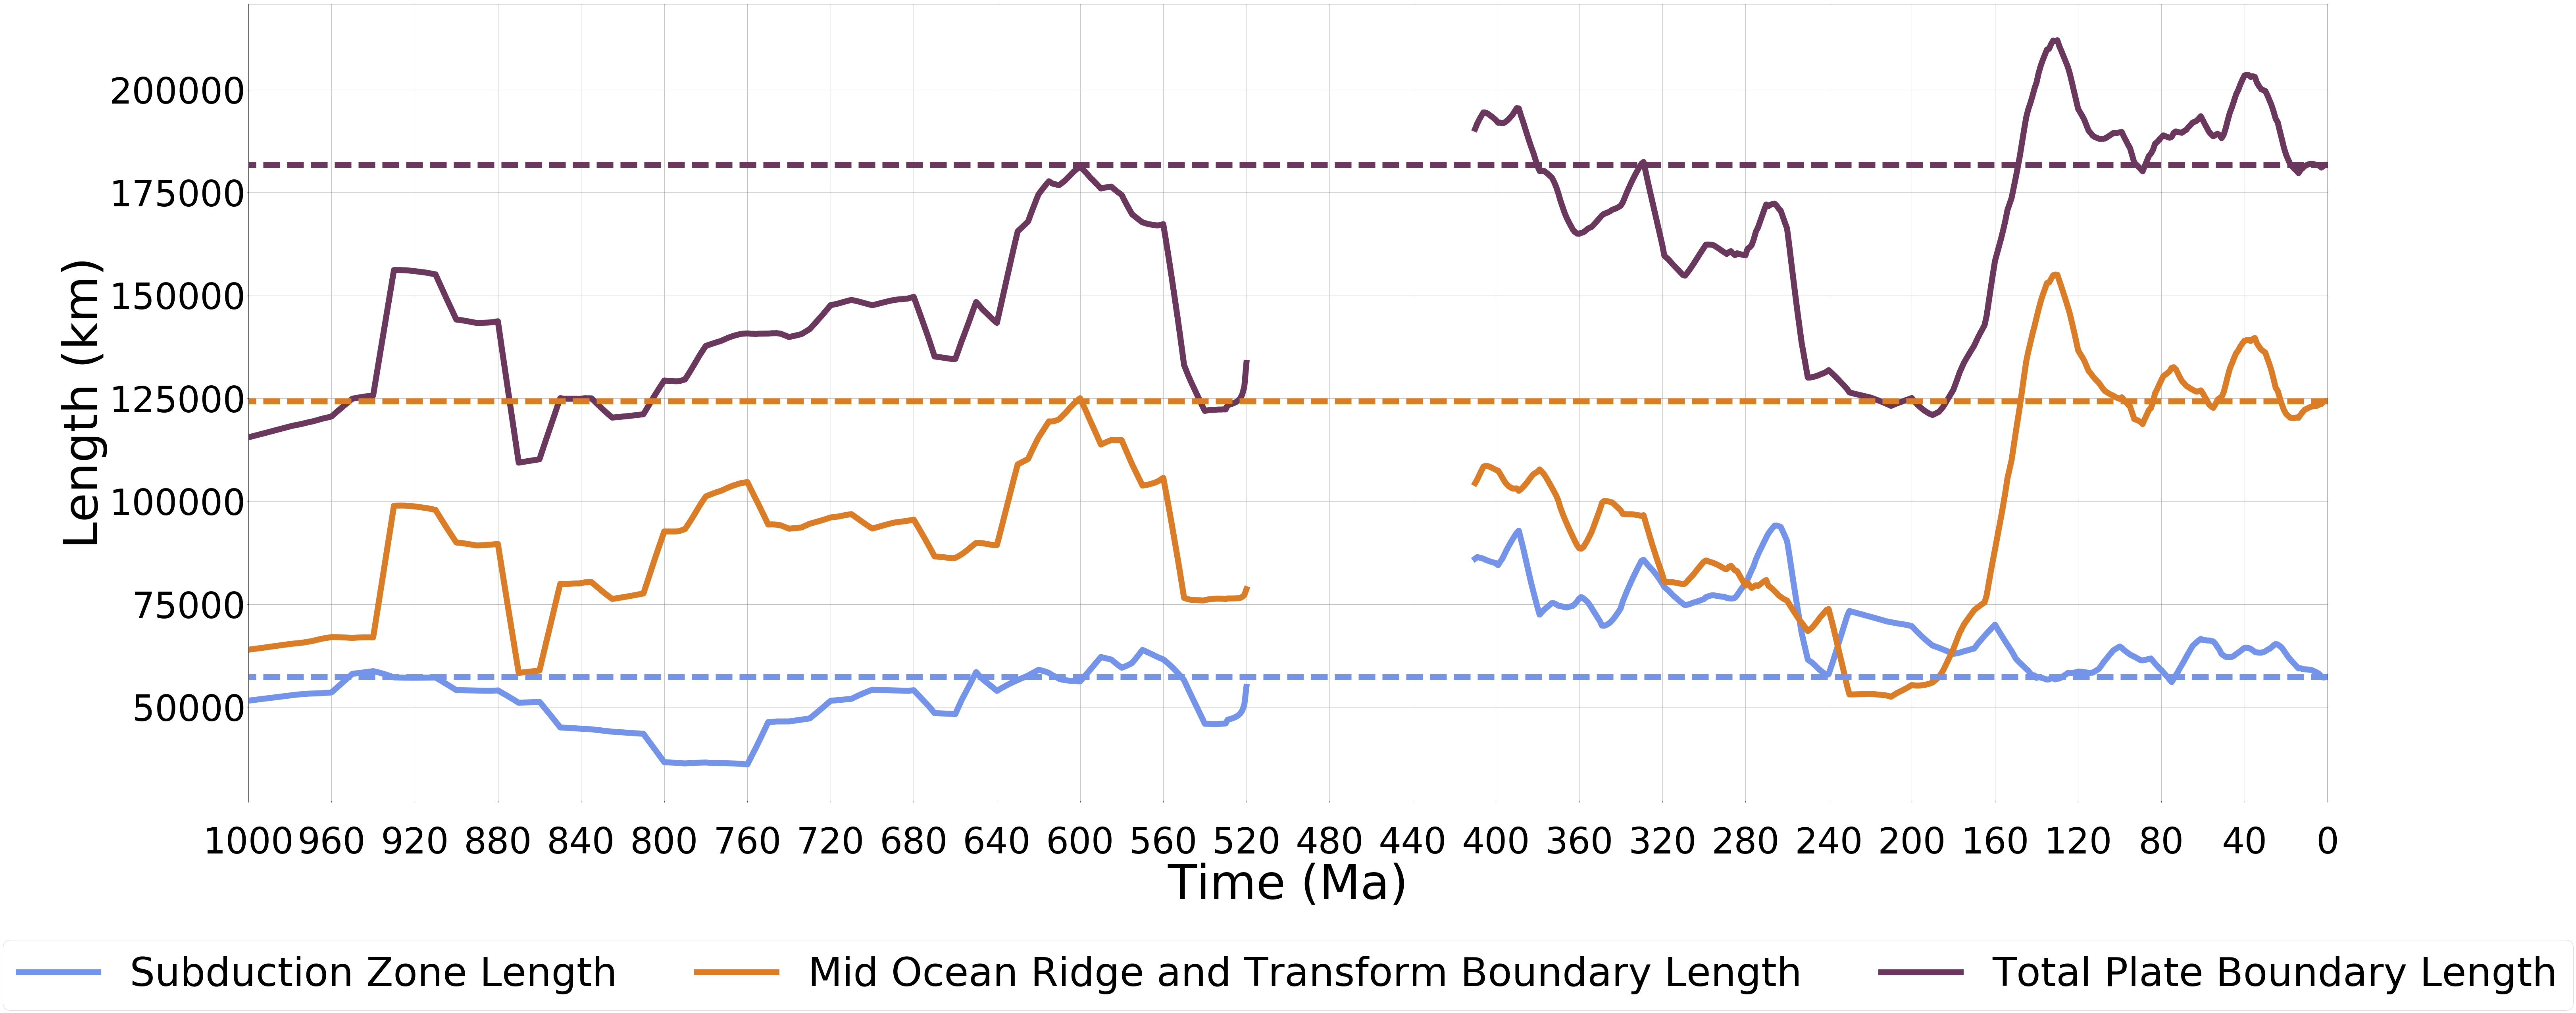

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80,32),facecolor='w', edgecolor='k')
#ax.plot(time_Neop, Ridge_rolling_mean, color='#c75146', linewidth=linewidth, label='Ridge Length')
ax.plot(time_Neop, Trench_rolling_mean, color='#7494ea', linewidth=linewidth, label='Subduction Zone Length')
#ax.plot(time_Neop, Fault_rolling_mean, color='#95b46a', linewidth=linewidth, label='Fault Length')
ax.plot(time_Neop, Ridge_Fault_rolling_mean, color='#db7c26', linewidth=linewidth, label='Mid Ocean Ridge and Transform Boundary Length')
ax.plot(time_Neop, Total_rolling_mean, color='#69385c', linewidth=linewidth, label='Total Plate Boundary Length')
#ax.plot(time_Matthews, Ridge_rolling_mean_Matthews, color='#c75146', linewidth=linewidth, label='Ridge Length')
ax.plot(time_Matthews, Trench_rolling_mean_Matthews, color='#7494ea', linewidth=linewidth)
#ax.plot(time_Matthews, Fault_rolling_mean_Matthews, color='#95b46a', linewidth=linewidth, label='Fault Length')
ax.plot(time_Matthews, Ridge_Fault_rolling_mean_Matthews, color='#db7c26', linewidth=linewidth)
ax.plot(time_Matthews, Total_rolling_mean_Matthews, color='#69385c', linewidth=linewidth)
#ax.plot((0, 1000), (Ridge_rolling_mean_PD, Ridge_rolling_mean_PD), color='#c75146', ls='--', linewidth=linewidth, label='Ridge Length Present Day')
ax.plot((0, 1000), (Trench_rolling_mean_PD, Trench_rolling_mean_PD), color='#7494ea', ls='--',linewidth=linewidth)#, label='Subduction Zone Length Present Day')
#ax.plot((0, 1000), (Fault_rolling_mean_PD, Fault_rolling_mean_PD), color='#95b46a', ls='--',linewidth=linewidth, label='Fault Length Present Day')
ax.plot((0, 1000), (Ridge_Fault_rolling_mean_PD, Ridge_Fault_rolling_mean_PD), color='#db7c26', ls='--', linewidth=linewidth)#, label='Mid Ocean Ridge and Transform Boundary Length Present Day')
ax.plot((0, 1000), (Total_rolling_mean_PD, Total_rolling_mean_PD), color='#69385c', ls='--',linewidth=linewidth)#, label='Total Plate Boundary Length Present Day')
#ax.plot(time_Neop, xRidge, 'o', color='#c75146', markersize=markersize, alpha=0.1)
#ax.plot(time_Neop, xTrench, 'o', color='#7494ea', markersize=markersize, alpha=0.1)
#ax.plot(time_Neop, xFault, 'o', color='#95b46a', markersize=markersize, alpha=0.1)
#ax.plot(time_Neop, xTotal, 'o', color='#7494ea', markersize=markersize, alpha=0.1)
#ax.plot(time_Neop, Ridge_Fault, 'o', color='#db7c26', markersize=markersize, alpha=0.1)
ax.tick_params(axis='x', labelsize=tick_fontsize, pad=60)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.set_xticks(major_ticks)
ax.set_xlim(1000,0)
#ax.set_ylim(40000,200000)
ax.set_xlabel('Time (Ma)', fontsize=axes_title_fontsize)
ax.set_ylabel('Length (km)', fontsize=axes_title_fontsize)
#ax.set_axis_bgcolor('#b6b6b0')
ax.grid(True)
ax.legend(fontsize=leg_font,bbox_to_anchor=(0.5,-0.15), loc='upper center', ncol=3)#, mode='expand')
plt.tight_layout()
plt.savefig('Plate_boundary_length.svg', bbox_inches='tight')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


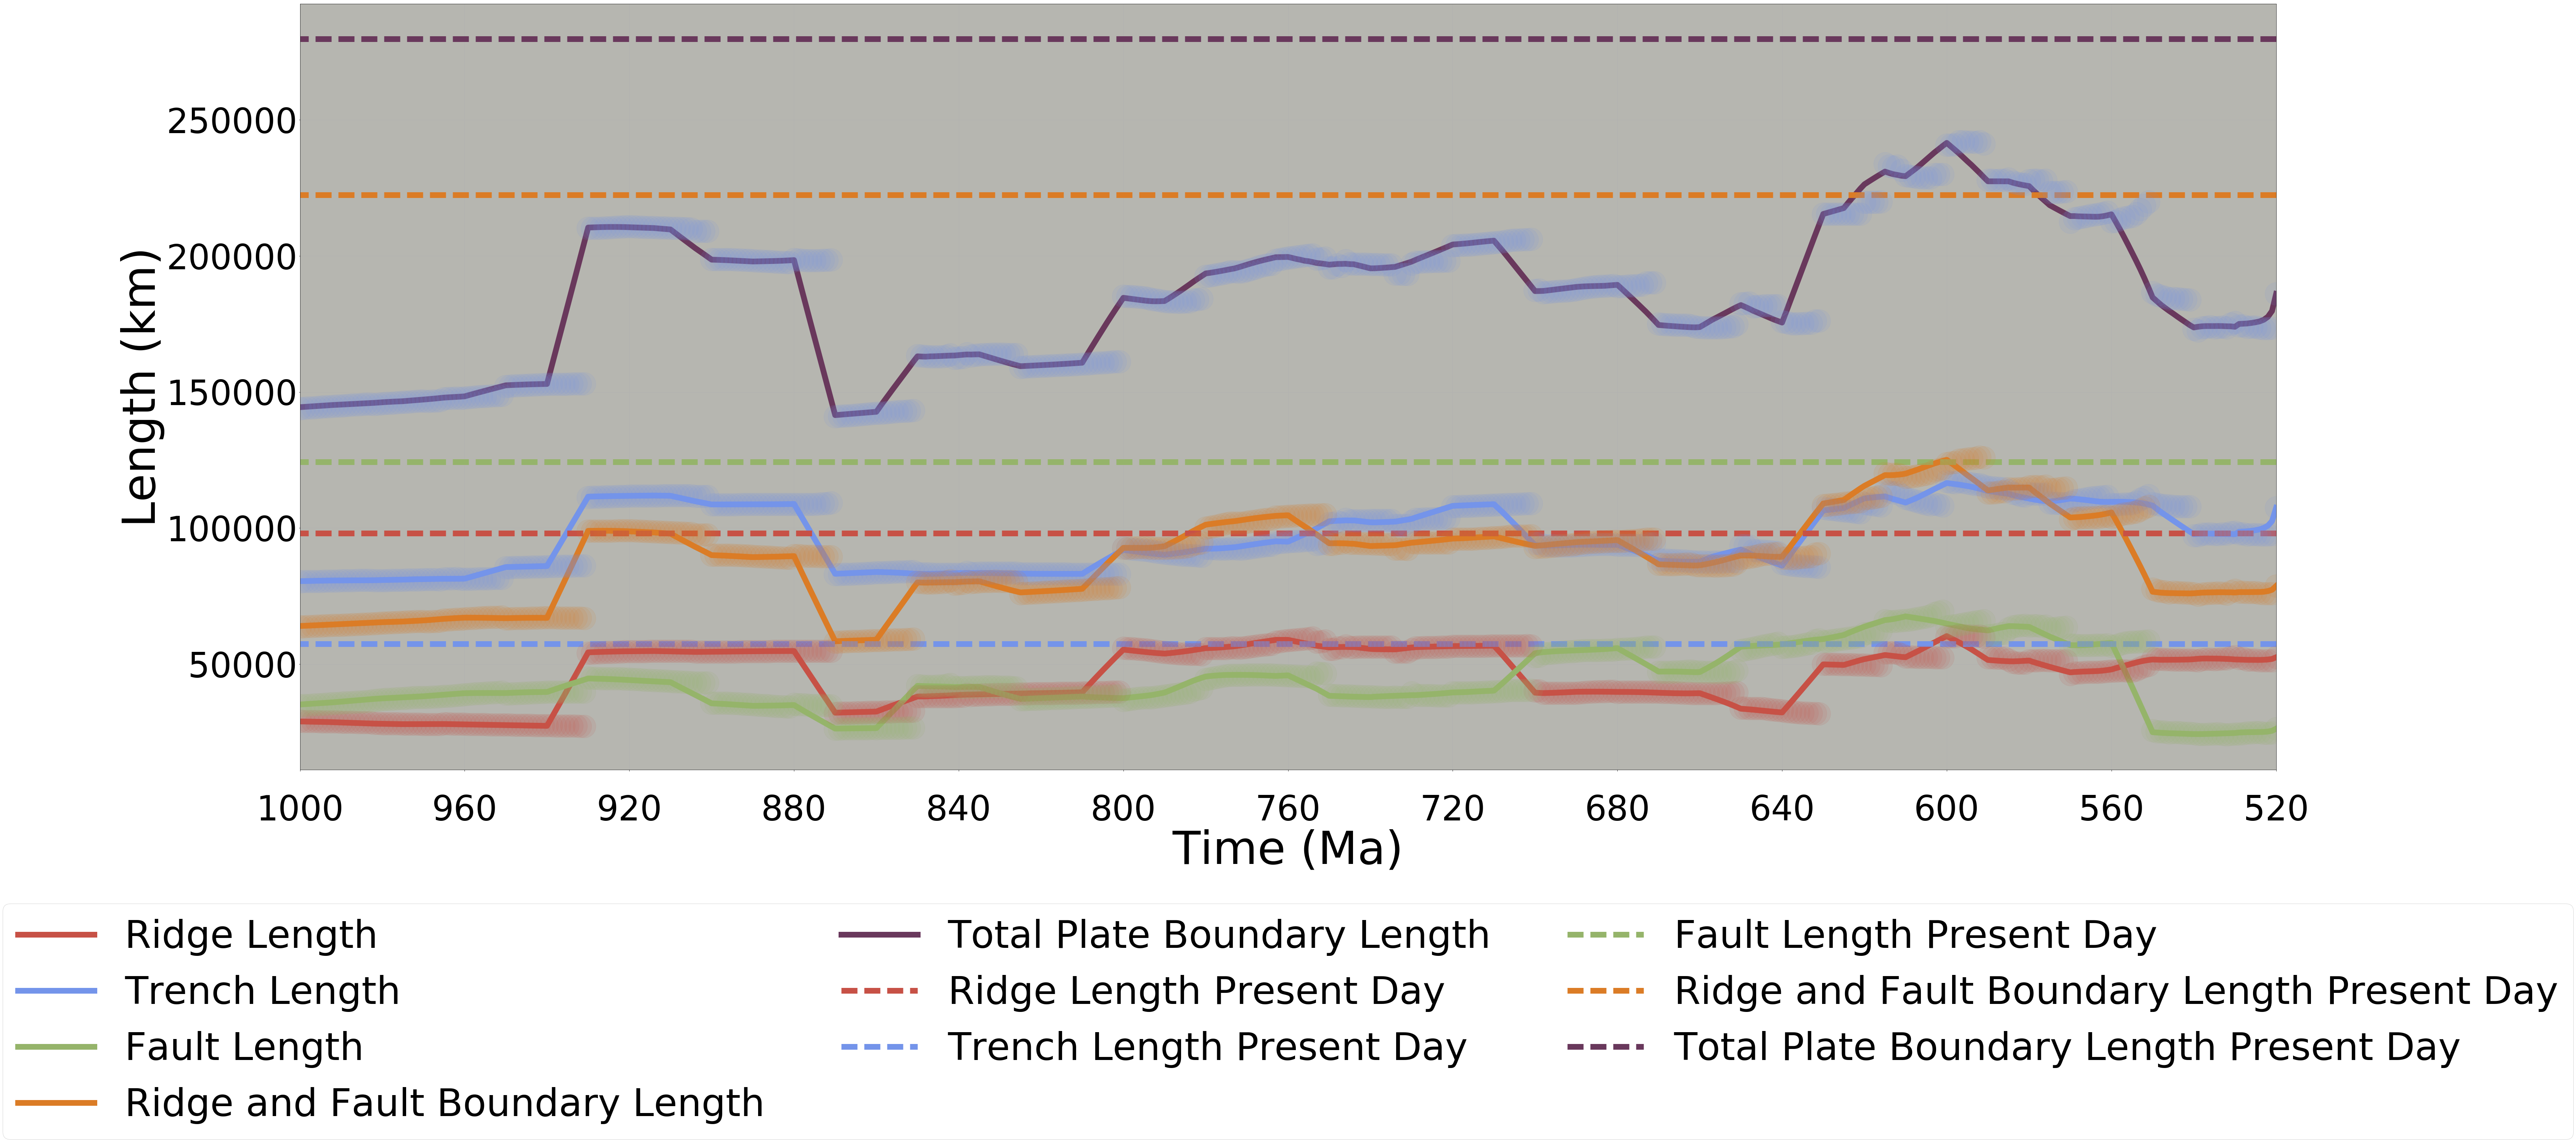

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80,32),facecolor='w', edgecolor='k')
ax.plot(time, Ridge_rolling_mean, color='#c75146', linewidth=linewidth, label='Ridge Length')
ax.plot(time, Trench_rolling_mean, color='#7494ea', linewidth=linewidth, label='Trench Length')
ax.plot(time, Fault_rolling_mean, color='#95b46a', linewidth=linewidth, label='Fault Length')
ax.plot(time, Ridge_Fault_rolling_mean, color='#db7c26', linewidth=linewidth, label='Ridge and Fault Boundary Length')
ax.plot(time, Total_rolling_mean, color='#69385c', linewidth=linewidth, label='Total Plate Boundary Length')
ax.plot((520, 1000), (Ridge_rolling_mean_PD, Ridge_rolling_mean_PD), color='#c75146', ls='--', linewidth=linewidth, label='Ridge Length Present Day')
ax.plot((520, 1000), (Trench_rolling_mean_PD, Trench_rolling_mean_PD), color='#7494ea', ls='--',linewidth=linewidth, label='Trench Length Present Day')
ax.plot((520, 1000), (Fault_rolling_mean_PD, Fault_rolling_mean_PD), color='#95b46a', ls='--',linewidth=linewidth, label='Fault Length Present Day')
ax.plot((520, 1000), (Ridge_Fault_rolling_mean_PD, Ridge_Fault_rolling_mean_PD), color='#db7c26', ls='--', linewidth=linewidth, label='Ridge and Fault Boundary Length Present Day')
ax.plot((520, 1000), (Total_rolling_mean_PD, Total_rolling_mean_PD), color='#69385c', ls='--',linewidth=linewidth, label='Total Plate Boundary Length Present Day')
ax.plot(time, xRidge, 'o', color='#c75146', markersize=markersize, alpha=0.1)
ax.plot(time, xTrench, 'o', color='#7494ea', markersize=markersize, alpha=0.1)
ax.plot(time, xFault, 'o', color='#95b46a', markersize=markersize, alpha=0.1)
ax.plot(time, xTotal, 'o', color='#7494ea', markersize=markersize, alpha=0.1)
ax.plot(time, Ridge_Fault, 'o', color='#db7c26', markersize=markersize, alpha=0.1)
ax.tick_params(axis='x', labelsize=tick_fontsize, pad=60)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.set_xticks(major_ticks)
ax.set_xlim(1000,520)
ax.set_xlabel('Time (Ma)', fontsize=axes_title_fontsize)
ax.set_ylabel('Length (km)', fontsize=axes_title_fontsize)
ax.set_axis_bgcolor('#b6b6b0')
ax.grid(True)
ax.legend(fontsize=leg_font,bbox_to_anchor=(0.5,-0.15), loc='upper center', ncol=3)#, mode='expand')
plt.tight_layout()
plt.savefig('Plate_boundary_length.svg', bbox_inches='tight')